<a href="https://colab.research.google.com/github/Rethick11/breast_cancer_prediction/blob/master/MLproject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix 
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import datasets
from sklearn.model_selection import  train_test_split ,cross_val_score ,GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix
from sklearn.model_selection import KFold
import time

In [ ]:
data = datasets.load_breast_cancer()
X = data.data
Y = data.target

In [ ]:
data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [ ]:
data.target_names

array(['malignant', 'benign'], dtype='<U9')

**Splitting Train and Test**


In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size = 0.2,random_state = 47)

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(455, 30)
(455,)
(114, 30)
(114,)


***Data Visualization***

In [ ]:
X = pd.DataFrame(data.data,columns = data.feature_names)
Y = pd.DataFrame(Y)

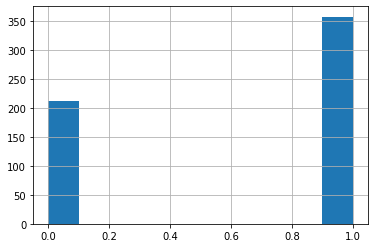

In [ ]:
Y[0].hist()

*checking correlations*

In [ ]:
X.corr()


#correlation matrix

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
mean radius,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,0.679090,-0.097317,0.674172,0.735864,-0.222600,0.206000,0.194204,0.376169,-0.104321,-0.042641,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
mean texture,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,0.275869,0.386358,0.281673,0.259845,0.006614,0.191975,0.143293,0.163851,0.009127,0.054458,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
mean perimeter,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,0.691765,-0.086761,0.693135,0.744983,-0.202694,0.250744,0.228082,0.407217,-0.081629,-0.005523,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
mean area,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,0.732562,-0.066280,0.726628,0.800086,-0.166777,0.212583,0.207660,0.372320,-0.072497,-0.019887,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
mean smoothness,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,0.301467,0.068406,0.296092,0.246552,0.332375,0.318943,0.248396,0.380676,0.200774,0.283607,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
mean compactness,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,0.497473,0.046205,0.548905,0.455653,0.135299,0.738722,0.570517,0.642262,0.229977,0.507318,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
mean concavity,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,0.631925,0.076218,0.660391,0.617427,0.098564,0.670279,0.691270,0.683260,0.178009,0.449301,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
mean concave points,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,0.698050,0.021480,0.710650,0.690299,0.027653,0.490424,0.439167,0.615634,0.095351,0.257584,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
mean symmetry,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,0.303379,0.128053,0.313893,0.223970,0.187321,0.421659,0.342627,0.393298,0.449137,0.331786,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413
mean fractal dimension,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,0.000111,0.164174,0.039830,-0.090170,0.401964,0.559837,0.446630,0.341198,0.345007,0.688132,-0.253691,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297


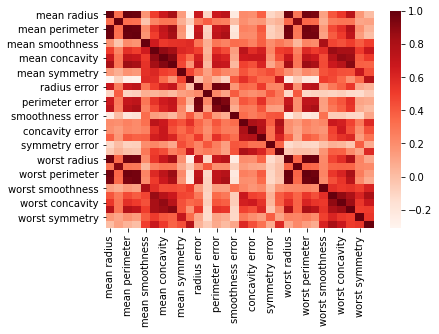

In [ ]:
corr = X.corr()
sns.heatmap(corr, cmap=plt.cm.Reds)

#seems there is many correlations

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7fe58ef0b8>,
      dtype=object)

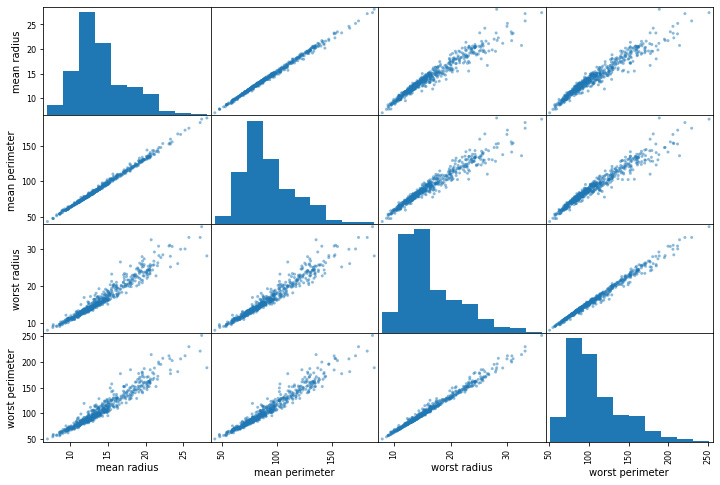

In [ ]:
attributes = ["mean radius" , "mean perimeter" ,"worst radius","worst perimeter"]
scatter_matrix(X[attributes] , figsize=(12,8))

# there is so much correlaations in the datas

**Best Model Selection**

In [ ]:
models_list = []
models_list.append(('logistic', LogisticRegression()))
models_list.append(('SVM', LinearSVC())) 
models_list.append(('RBF_Svm', SVC(kernel='rbf')))
models_list.append(('Poly_Svm', SVC(kernel='poly')))
models_list.append(('DTree', DecisionTreeClassifier()))
models_list.append(('GBoost', GradientBoostingClassifier()))

In [ ]:
results = []
names = []

for name, model in models_list:
    kfold = KFold(n_splits=10, random_state=123)    
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')    
    results.append(cv_results.mean())
    names.append(name)
    

In [ ]:
for (i,j) in zip(names,results):
  print(f'Name : {i} , Score : {j} ')

Name : logistic , Score : 0.9428019323671497 
Name : SVM , Score : 0.9074879227053142 
Name : RBF_Svm , Score : 0.9165700483091788 
Name : Poly_Svm , Score : 0.9143478260869566 
Name : DTree , Score : 0.9297584541062802 
Name : GBoost , Score : 0.9670531400966184 


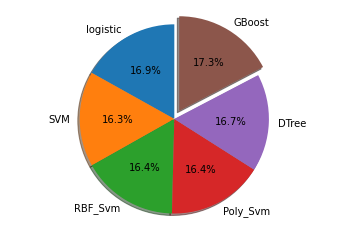

In [ ]:
sizes = results
explode = (0, 0, 0, 0, 0, 0.1)
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=names, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.show()

**Model Preparation**

In [ ]:
GradientBoostingClassifier()

*Hyper Parameters Tuning*

In [ ]:
param = {"n_estimators" : [20,100,250,300] ,"learning_rate" : [0.1,0.001,0.0001] ,"max_depth":[2,3]}
grid = GridSearchCV(gboost_clf,param_grid=param,scoring='accuracy',)

In [ ]:
grid.fit(X_train,y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                  criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=100,
                                                  n_iter_no_change=None,
      

In [ ]:
grid.best_estimator_

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=250,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [ ]:
gboost = GradientBoostingClassifier(learning_rate=0.1,max_depth=3,n_estimators=250)

In [ ]:
gboost.fit(X_train,y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=250,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

*Validation*

In [ ]:
kfold = KFold(n_splits=10, random_state=123)
cv_results = cross_val_score(gboost, X_train, y_train, cv=kfold, scoring='accuracy') 

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


In [ ]:
cv_results.mean() // 97% accuracy

0.9692753623188406

**Testing**

In [ ]:
pred = gboost.predict(X_test)

In [ ]:
accuracy_score(y_test,pred)

0.9649122807017544

In [ ]:
confusion_matrix(y_test,pred)

array([[42,  2],
       [ 2, 68]])